# Estadística 3 27/07

In [20]:
from pydataset import data
import numpy as np
from scipy import stats 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import skew

In [21]:
df = pd.read_csv("data/german_credit_data.csv")
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
    * Tabla de contingencia
    * Coeficiente de correlación de las variables numéricas del dataset.
    * Sesgos de alguna de las variables numéricas del dataset.
    * Intervalo de confianza de algunas de las variables numéricas del dataset
2. Interpretación de los resultados.
Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

Como la tabla de contingencia es para las variables categóricas, vamos a utilizar las columnas "Sex", "Housing" y "Purpose" para  buscar si existe una posible relación entre el género, el tipo de arrendamiento que tienen y el propósito de su crédito.

Comenzamos a realizar la tabla de contingencia de las variable "Sex" y "Housing" para  buscar si existe una posible relación entre el género y el tipo de arrendamiento que tienen por si podría influir a la hora de conseguir un crédito.

In [22]:
pd.crosstab(df['Sex'],df['Housing'])

Housing,free,own,rent
Sex,,,
female,19,196,95
male,89,517,84


Podemos decir que la inmensa mayoría que les conceden un crédito tienen casa en propiedad. Además, vemos que les conceden más créditos a los hombres que a las mujeres.

Seguimos con la tabla de contingencia y esta vez analizamos las variable "Sex" y "Purpose" para  buscar si existe una posible relación entre el género y el motivo del créditp  por si podría influir a la hora de conseguir un crédito.

In [23]:
pd.crosstab(df['Sex'],df['Purpose'])

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Sex,,,,,,,,
female,19,94,6,24,74,85,5,3
male,78,243,6,35,107,195,17,9


Contemplamos que hay una gran diferencia en el motivo del crédito, es decir, hay muchos más hombres que piden un crédito para comprarse un coche. También, vemos que se conceden créditos para cosas del día a día como un coche o para muebles, en vez de para vacaciones.

Comenzamos a realizar la tabla de contingencia de las variable "Saving accounts" para  buscar si existe una posible relación entre la cantidad de ahorros y el género para saber si podría influir a la hora de conseguir un crédito.

In [24]:
pd.crosstab(df['Saving accounts'], 
                            df['Sex'])

Sex,female,male
Saving accounts,,
little,194,409
moderate,32,71
quite rich,16,47
rich,19,29


Aunque observamos que hay más hombres que mujeres, la inmensa mayoría, independientemente del género, tienen pocos ahorros. Esto tiene sentido porque generalmente las personas que tienen ahorros no necesitan pedir un crédito.

A continuación, procedemos a tratar de hallar el coeficiente de correlación de las variables numéricas del dataset.

Primero, vemos cuáles son nuestras variables numéricas.

In [25]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

Aunque "job" ponga que es numérica, en realidad, es una falsa numérica porque contiene valores  aislados. Creamos a partir de aquí, un nuevo dataframe soloamente con las variables numéricas.

In [26]:
columnas = ['Age','Credit amount','Duration']
df_sin = df[columnas]
df_sin.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


Procedemos a realizar la correlación entre las variables numéricas.

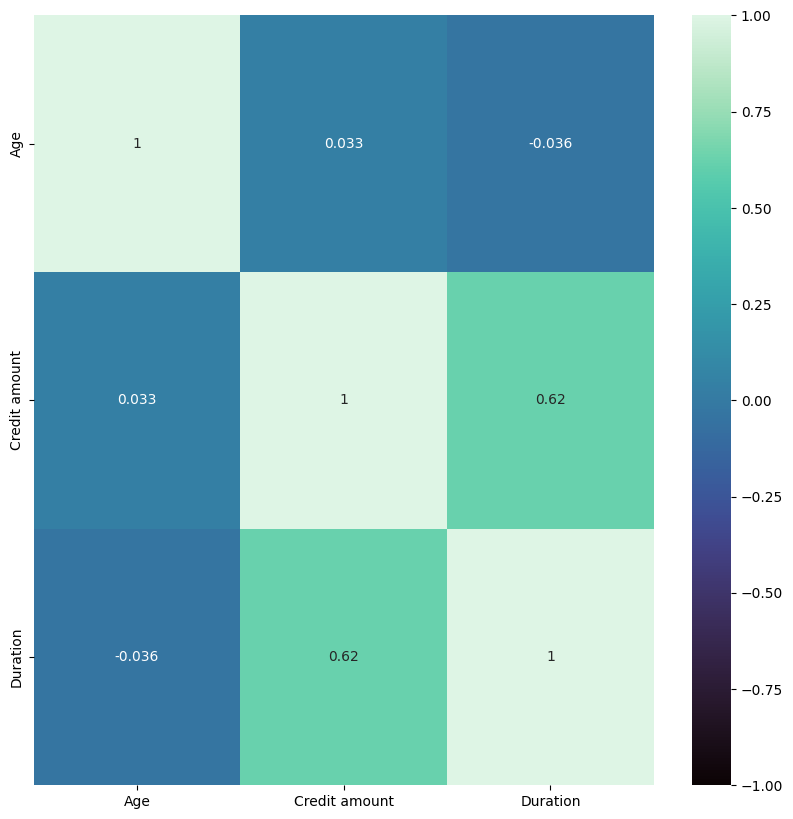

In [27]:
plt.figure(figsize = (10,10))

sns.heatmap(df_sin.corr(), cmap = "mako", annot = True, vmin = -1, vmax = 1); 

Como vemos, no existe mucha correlación entre ellas. Solamente vemos más correlación entre "Credit amount" y "Duration". Tiene sentido, puesto que a mayor cantidad de crédito, mayor tiempo puede ser necesario para devolver el importe prestado.

Ahora vamos a buscar sesgos de alguna de la variable numérica 'Age' y de 'Credit amount'.

/home/andrea/anaconda3/envs/adalabenv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


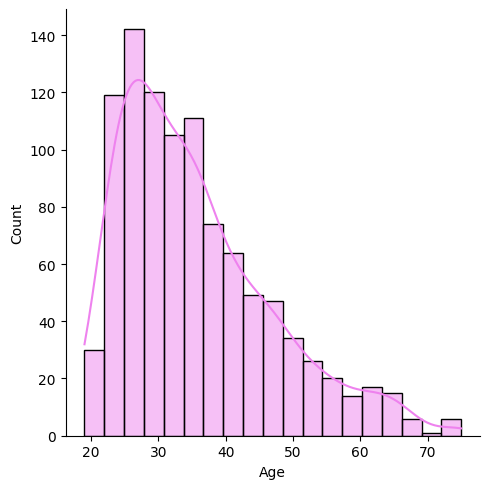

In [28]:
sns.displot(df["Age"], color = "violet", kde = True);

In [29]:
skew(df['Age'])

1.019207521364841

/home/andrea/anaconda3/envs/adalabenv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


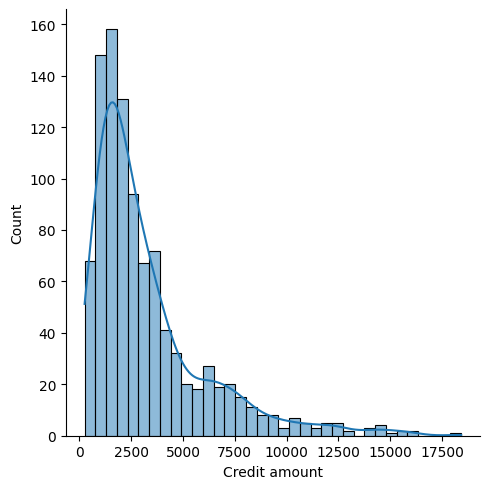

In [30]:
sns.displot(df['Credit amount'],kde=True)

In [31]:
skew(df['Credit amount'])

1.946702018941924

En los dos casos vemos una cola a la derecha, lo cual corresponde con un skew positivo y, por lo tanto, las dos variables están sesgadas a la derecha.

Ahora vamos a calcular el intervalo de confianza de algunas de la variables numéricas de edad y cantidad de crédito a un 95% de probabilidad.

In [36]:
datos = df['Age']
print(st.t.interval(confidence=0.95, df=len(datos)-1, loc=np.mean(datos), scale=st.sem(datos)))

print(np.mean(datos))

(34.840098873594314, 36.251901126405684)
35.546


Podemos determinar que si cogemos un valor aleatorio, hay un 95% de posibilidades que esté en un rango entre entre 34.84 y 36.25.

In [38]:
datos = df['Credit amount']
print(st.t.interval(confidence=0.95, df=len(datos)-1, loc=np.mean(datos), scale=st.sem(datos)))

print(np.mean(datos))

(3096.093950513196, 3446.4220494868036)
3271.258


Podemos determinar que si cogemos un valor aleatorio, hay un 95% de posibilidades que esté en un rango entre entre 3096 y 3446.